# Determinação do Comportamento Reológico dos FLuidos

## Viscosímetro de Tubo - Capilar de Vidro

De maneira geral, esses instrumentos medem o tempo necessário para que um fluido escoe, e através do tempo e da vazão, conseguem determinar sua viscosidade. Suas propriedades são:
    • Seu diâmetro varia de 0,1 a 4mm;
    • Operam sobre ação da gravidade.
    • São utilizados para medição da viscosidade de fluidos newtonianos.

Vídeo: https://youtu.be/AVudF0gbO2s

Exemplo1: Na determinação das propriedades reológicas de leite integral foi utilizado um reômetro de tubo capilar (L = 1,2m, R = 5mm), obtendo-se os valores apresentados na tabela 3.8. Construa a curva de fluxo do fluido e determine o seu comportamento reológico e os parâmetros do modelo que melhor se ajusta aos dados. Considere o escoamento laminar.


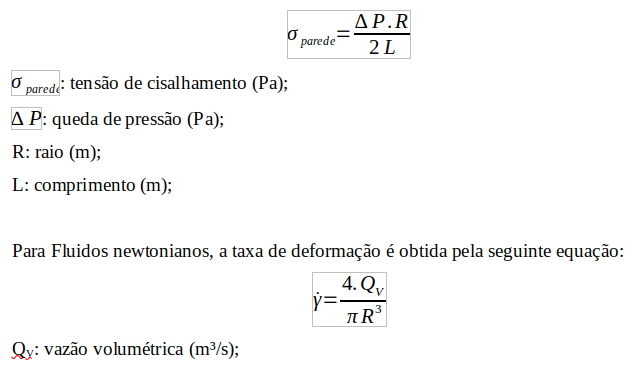

In [5]:
Image("/home/mirian/Imagens/Captura de tela de 2022-03-09 11-14-12.png")

In [13]:
!pip install scipy.optimize

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement scipy.optimize (from versions: none)
ERROR: No matching distribution found for scipy.optimize


In [14]:
import pandas as pd
import numpy as np
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import unicodedata
from scipy.optimize import curve_fit

In [16]:
dados1 = pd.read_csv('/home/mirian/Ex1.csv')

In [17]:
L = 1.2
R = 5e-3

In [18]:
dados1.head()

,∆P(Pa),Q (cm³/s-1)
0,"66,2","0,94"
1,"199,6","2,82"
2,"332,7","4,69"
3,"465,8","6,57"
4,"699,4","9,39"


In [19]:
dados1.rename(columns = {'∆P(Pa)': 'Pressao[Pa]', 'Q (cm³/s-1)': 'Q[cm³/s]'}, inplace = True)

In [20]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pressao[Pa]  15 non-null     object
 1   Q[cm³/s]     15 non-null     object
dtypes: object(2)
memory usage: 368.0+ bytes


In [21]:
#### Trocando virgula por ponto e transformando em float
dados1["Pressao[Pa]"] = dados1["Pressao[Pa]"].apply(lambda field: float(field.replace(",",".")))
dados1["Q[cm³/s]"] = dados1["Q[cm³/s]"].apply(lambda field: float(field.replace(",",".")))

In [22]:
dados1

,Pressao[Pa],Q[cm³/s]
0,66.2,0.94
1,199.6,2.82
2,332.7,4.69
3,465.8,6.57
4,699.4,9.39
5,834.4,11.26
6,950.0,13.14
7,1131.1,15.96
8,1197.7,16.90
9,1257.4,17.83


In [23]:
dados1['Q[m³/s]']=dados1['Q[cm³/s]']*(1e-6)

In [24]:
dados1

,Pressao[Pa],Q[cm³/s],Q[m³/s]
0,66.2,0.94,9.400000e-07
1,199.6,2.82,2.820000e-06
2,332.7,4.69,4.690000e-06
3,465.8,6.57,6.570000e-06
4,699.4,9.39,9.390000e-06
5,834.4,11.26,1.126000e-05
6,950.0,13.14,1.314000e-05
7,1131.1,15.96,1.596000e-05
8,1197.7,16.90,1.690000e-05
9,1257.4,17.83,1.783000e-05


#### Aplicando equações para transformar em tensao de cisamlhamento (sigma) e taxa de deformação (lambda)

In [25]:
dados1['sigma']=(dados1['Pressao[Pa]']*R)/(2*L)
dados1['gama']=(4*dados1['Q[m³/s]'])/(R**3*np.pi)
dados1

,Pressao[Pa],Q[cm³/s],Q[m³/s],sigma,gama
0,66.2,0.94,9.400000e-07,0.137917,9.574761
1,199.6,2.82,2.820000e-06,0.415833,28.724284
2,332.7,4.69,4.690000e-06,0.693125,47.771948
3,465.8,6.57,6.570000e-06,0.970417,66.921470
4,699.4,9.39,9.390000e-06,1.457083,95.645755
5,834.4,11.26,1.126000e-05,1.738333,114.693418
6,950.0,13.14,1.314000e-05,1.979167,133.842941
7,1131.1,15.96,1.596000e-05,2.356458,162.567225
8,1197.7,16.90,1.690000e-05,2.495208,172.141986
9,1257.4,17.83,1.783000e-05,2.619583,181.614889


In [26]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dados1.gama, dados1.sigma)
slope = slope.round(4)
intercept = intercept.round(4)
r_2 = r_value.round(4)
ylabel = unicodedata.lookup('GREEK SMALL LETTER SIGMA') + ' [Pa]'
xlabel = unicodedata.lookup('GREEK SMALL LETTER GAMMA') + ' [1/s]'

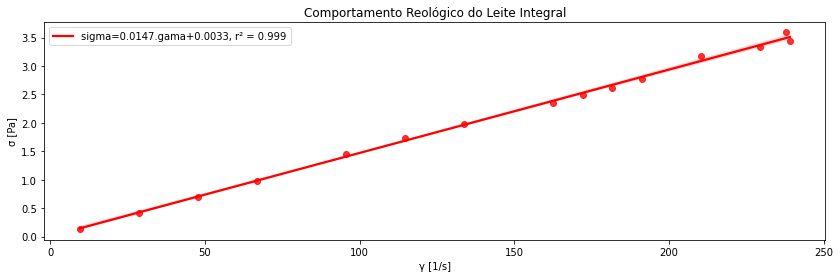

In [27]:
plt.figure(figsize = (14,4))
figura1 = sns.regplot(x = dados1.gama, y = dados1.sigma, data = dados1,color = 'red', line_kws = {'label':f'sigma={slope}.gama+{intercept}, r² = {r_2}'})
figura1.set_title('Comportamento Reológico do Leite Integral')
figura1.set_xlabel(xlabel)
figura1.set_ylabel(ylabel)
figura1.legend()
plt.show()

## CONCLUSÃO:
### Fluido Newtoniano, R² = 0.999
### Viscosidade = 0,0147

### Exemplo2: 
#### Na determinação das propriedades reológicas de maionese a 28°C foi utilizado um viscosímetro de tubo capilar (L = 1,2m, R = 8mm), obtendo-se os resultados na tabela 3.10. Construa a curva do fluxo do fluido e determine o seu comportamento reológico e os parâmetros do modelo que melhor se ajustam aos dados.

In [28]:
dados2 = pd.read_csv('/home/mirian/Ex2.csv')
L = 1.2
R = 8e-3

In [29]:
dados2

,∆P (Pa),Q (m³/h)
0,"5299,8","0,013"
1,"10772,7","0,039"
2,"15206,2","0,065"
3,"19103,7","0,095"
4,"27549,1","0,161"
5,"32580,9","0,215"
6,"33582,4","0,22"
7,"33357,9","0,233"
8,35792,"0,245"
9,"35649,9","0,258"


In [30]:
dados2.rename(columns={'∆P (Pa)':'Pressao[Pa]', 'Q (m³/h)':'Q[m3/h]'}, inplace=True)
dados2

,Pressao[Pa],Q[m3/h]
0,"5299,8","0,013"
1,"10772,7","0,039"
2,"15206,2","0,065"
3,"19103,7","0,095"
4,"27549,1","0,161"
5,"32580,9","0,215"
6,"33582,4","0,22"
7,"33357,9","0,233"
8,35792,"0,245"
9,"35649,9","0,258"


In [31]:
#### Trocando virgula por ponto e transformando em float
dados2["Pressao[Pa]"] = dados2["Pressao[Pa]"].apply(lambda field: float(field.replace(",",".")))
dados2["Q[m3/h]"] = dados2["Q[m3/h]"].apply(lambda field: float(field.replace(",",".")))

In [32]:
dados2

,Pressao[Pa],Q[m3/h]
0,5299.8,0.013
1,10772.7,0.039
2,15206.2,0.065
3,19103.7,0.095
4,27549.1,0.161
5,32580.9,0.215
6,33582.4,0.220
7,33357.9,0.233
8,35792.0,0.245
9,35649.9,0.258


In [33]:
dados2['Q[m3/s]']= dados2['Q[m3/h]']/3600
dados2

,Pressao[Pa],Q[m3/h],Q[m3/s]
0,5299.8,0.013,0.000004
1,10772.7,0.039,0.000011
2,15206.2,0.065,0.000018
3,19103.7,0.095,0.000026
4,27549.1,0.161,0.000045
5,32580.9,0.215,0.000060
6,33582.4,0.220,0.000061
7,33357.9,0.233,0.000065
8,35792.0,0.245,0.000068
9,35649.9,0.258,0.000072


In [34]:
dados2['sigma']=(dados2['Pressao[Pa]']*R)/(2*L)
dados2['gama']=(4*dados2['Q[m3/s]'])/(R**3*np.pi)
dados2

,Pressao[Pa],Q[m3/h],Q[m3/s],sigma,gama
0,5299.8,0.013,0.000004,17.666000,8.980097
1,10772.7,0.039,0.000011,35.909000,26.940290
2,15206.2,0.065,0.000018,50.687333,44.900483
3,19103.7,0.095,0.000026,63.679000,65.623783
4,27549.1,0.161,0.000045,91.830333,111.215043
5,32580.9,0.215,0.000060,108.603000,148.516982
6,33582.4,0.220,0.000061,111.941333,151.970866
7,33357.9,0.233,0.000065,111.193000,160.950962
8,35792.0,0.245,0.000068,119.306667,169.240282
9,35649.9,0.258,0.000072,118.833000,178.220379


In [59]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dados2.gama, dados2.sigma)
slope = slope.round(4)
intercept = intercept.round(4)
r_2 = r_value.round(4)
ylabel = unicodedata.lookup('GREEK SMALL LETTER SIGMA') + ' [Pa]'
xlabel = unicodedata.lookup('GREEK SMALL LETTER GAMMA') + ' [1/s]'

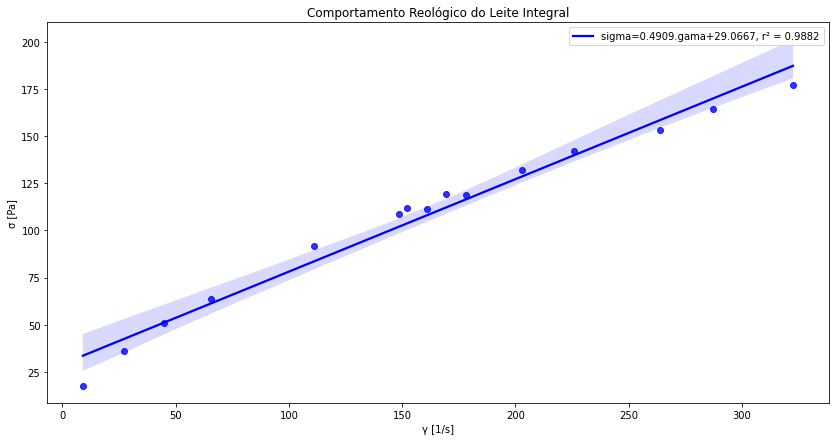

In [50]:
plt.figure(figsize = (14,7))
figura1 = sns.regplot(x = dados2.gama, y = dados2.sigma, data = dados2, color = 'blue', line_kws = {'label':f'sigma={slope}.gama+{intercept}, r² = {r_2}'})
figura1.set_title('Comportamento Reológico do Leite Integral')
figura1.set_xlabel(xlabel)
figura1.set_ylabel(ylabel)
figura1.legend()
plt.show()

### Como valor de r² < 0.999 vamos considerar que os fluido NÃO É NEWTONIANO!

In [51]:
dados2['ln(sigma)'] = np.log(dados2.sigma)
dados2['ln(gama)'] = np.log(dados2.gama)
dados2

,Pressao[Pa],Q[m3/h],Q[m3/s],sigma,gama,ln(sigma),ln(gama)
0,5299.8,0.013,0.000004,17.666000,8.980097,2.871642,2.195011
1,10772.7,0.039,0.000011,35.909000,26.940290,3.580988,3.293623
2,15206.2,0.065,0.000018,50.687333,44.900483,3.925676,3.804449
3,19103.7,0.095,0.000026,63.679000,65.623783,4.153855,4.183938
4,27549.1,0.161,0.000045,91.830333,111.215043,4.519943,4.711466
5,32580.9,0.215,0.000060,108.603000,148.516982,4.687699,5.000699
6,33582.4,0.220,0.000061,111.941333,151.970866,4.717975,5.023689
7,33357.9,0.233,0.000065,111.193000,160.950962,4.711267,5.081100
8,35792.0,0.245,0.000068,119.306667,169.240282,4.781697,5.131319
9,35649.9,0.258,0.000072,118.833000,178.220379,4.777719,5.183021


In [52]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dados2['ln(gama)'], dados2['ln(sigma)'])
slope = slope.round(4)
intercept = intercept.round(4)
r_2 = r_value.round(4)
ylabel = 'ln(' + unicodedata.lookup('GREEK SMALL LETTER SIGMA') + ') [Pa]'
xlabel = 'ln(' + unicodedata.lookup('GREEK SMALL LETTER GAMMA') + ') [1/s]'

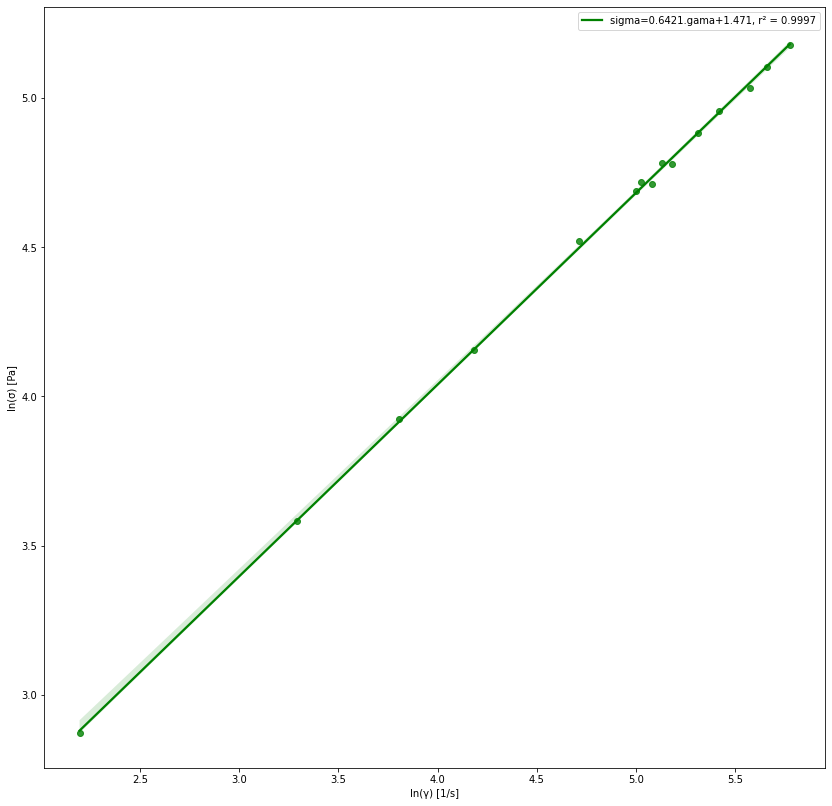

In [53]:
plt.figure(figsize = (14,14))
figura1 = sns.regplot(x = dados2['ln(gama)'], y = dados2['ln(sigma)'], data = dados1,color = 'green', line_kws = {'label':f'sigma={slope}.gama+{intercept}, r² = {r_2}'})
#figura1.set_title('Comportamento Reológico do Leite Integral')
figura1.set_xlabel(xlabel)
figura1.set_ylabel(ylabel)
figura1.legend()
plt.show()

In [54]:
n = slope
n

0.6421

In [55]:
# Fazendo o fit seguindo a lei da potencia
def func(x,k,n):
    return k*(x**n)
popt, pcov = curve_fit(func, dados2.gama, dados2.sigma)
popt

array([4.5460348 , 0.63366973])

In [56]:
pcov

array([[ 3.98076223e-02, -1.63620110e-03],
       [-1.63620110e-03,  6.77037111e-05]])

In [ ]:
ylabel = 'ln(' + unicodedata.lookup('GREEK SMALL LETTER SIGMA') + ') [Pa]'
xlabel = 'ln(' + unicodedata.lookup('GREEK SMALL LETTER GAMMA') + ') [1/s]'

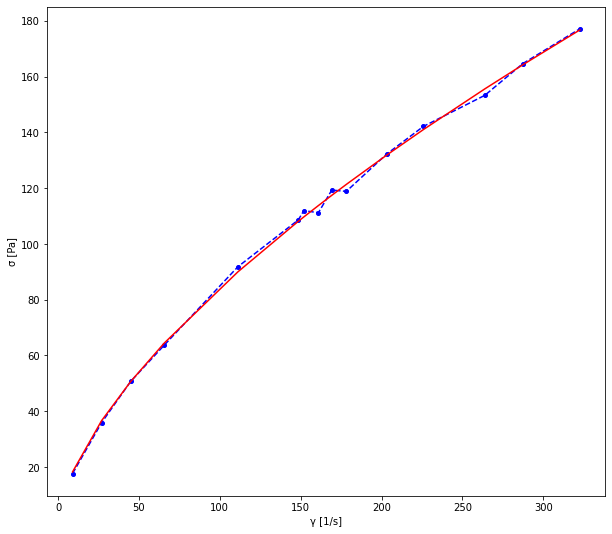

In [65]:
plt.figure(figsize= (10,9))
plt.plot(dados2.gama, dados2.sigma, linestyle = '--', marker = 'o', color = 'blue', markersize = 4 )
plt.plot(dados2.gama, func(dados2.gama, *popt), 'r-')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

In [73]:
n = str(popt[1].round(3))
k = str(popt[0].round(3))

In [74]:
equacao_final = unicodedata.lookup('GREEK SMALL LETTER SIGMA') +' = '+k +'.' +unicodedata.lookup('GREEK SMALL LETTER GAMMA') +'^(' +n +')'
equacao_final

'σ = 4.546.γ^(0.634)'

## Conclusão:
### Fluido não newtoniano, com comportamento reológico de PSEUDOPLÁSTICO.
### Indice de consistencia = 4,546